# <p style="background-color:gold; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Text Based Analysis Final Project           On             Loans Exploration - EDA</p>

   ![My Image](image.jpg)




# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Introduction

Welcome to the "Text-Based Analysis Final Project: ExtenKiva Loans Exploration - EDA," where we set sail on a data-driven voyage into the world of microfinance through the lens of ExtenKiva's loan dataset. This project is more than just numbers and charts; it's a narrative journey through the stories of entrepreneurs and dreamers from corners far and wide, supported by Kiva's microloans.

Our notebook is a canvas, and data is our palette. We'll start by setting up our environment with the right tools and importing the treasure trove of data that awaits our analysis. As we delve deeper, we'll uncover patterns, trends, and insights that lie hidden within the loan details, borrower demographics, funding dynamics, and repayment schedules.

From the initial data import to the sophisticated visual explorations, every step will bring us closer to understanding the impact of microfinance on individuals' lives and communities. Our analysis will not only highlight the quantitative aspects of the loans but also paint a qualitative picture of the hopes and challenges faced by Kiva's borrowers.

So, gear up for an analytical adventure that combines the rigor of data science with the heart of storytelling. Together, we'll navigate through this dataset, uncovering the essence of microfinance and its transformative potential. Let's embark on this journey of discovery and insight, exploring the world of ExtenKiva Loans through the lens of exploratory data analysis.

# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Objectives



1. **Introduction to ExtenKiva's Impact:**
   - To introduce the pivotal role of ExtenKiva in the microfinance sector, showcasing how it empowers entrepreneurs and individuals across diverse regions through its loan programs.

2. **Dataset Acquaintance:**
   - To familiarize ourselves with the ExtenKiva Loans dataset, understanding its structure, variables, and the kind of information it encapsulates to lay a strong foundation for in-depth analysis.

3. **Data Cleaning and Standardization:**
   - To ensure data quality and consistency by cleaning the dataset, including handling missing values, anomalies, and standardizing variable formats.

4. **Descriptive Statistical Analysis:**
   - To perform a comprehensive descriptive analysis, summarizing the central tendencies, dispersion, and shape of the dataset's distributions.

5. **Exploratory Data Analysis (EDA):**
   - To delve deep into the dataset using EDA techniques to uncover patterns, trends, and insights within the loan data and borrower demographics.

6. **Borrower Demographics Exploration:**
   - To examine the demographic characteristics of borrowers, such as gender, occupation, and geographical location, and assess their impact on loan dynamics.

7. **Loan Attributes Analysis:**
   - To analyze the specifics of loans, including amounts, purposes, sectors, and terms, understanding the financial landscape and needs of the borrowers.

8. **Temporal Dynamics and Trends:**
   - To investigate how loan issuance and repayments vary over time, identifying any seasonal or temporal trends that affect borrowing and lending behaviors.

9. **Impact and Outcome Assessment:**
   - To evaluate the outcomes and impact of loans on borrowers' lives and their communities, considering factors like loan size, purpose, and repayment rates.

10. **Insightful Visualizations and Storytelling:**
    - To employ data visualization techniques effectively to narrate the stories hidden within the data, making insights accessible to a wide audience.

11. **Strategic Recommendations and Conclusions:**
    - To synthesize findings into actionable recommendations for stakeholders and conclude with insights that reflect the broader implications of microfinance initiatives like those of ExtenKiva.

# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Importing libraries

In [196]:
# Importing libraries for data analysis and visualization
import numpy as np  # Numpy: Provides support for arrays, matrices, and high-level mathematical functions. Essential for linear algebra operations.
import pandas as pd  # Pandas: Offers data structures and tools for effective data manipulation and analysis. Ideal for working with tabular data like CSV files.
import matplotlib.pyplot as plt  # Matplotlib's pyplot: A plotting library for creating static, interactive, and animated visualizations in Python.
import seaborn as sns  # Seaborn: A statistical data visualization library based on matplotlib. It simplifies creating complex visualizations.
import plotly.offline as py  # Plotly's Offline module: Enables the creation of interactive plots that work offline, enhancing the interactivity of visualizations in Jupyter Notebooks.
py.init_notebook_mode(connected=True)  # Initializes Plotly's notebook mode to display interactive plots within a Jupyter Notebook.
import plotly.graph_objs as go  # Plotly's graph_objs: Provides objects for creating various types of Plotly charts and graphs.
import plotly.tools as tls  # Plotly's tools: Offers utility functions and tools for working with Plotly charts.


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Importing Data

In [197]:
# Loading Kiva loans data and Kiva MPI region locations data from CSV files into Pandas DataFrames
df_kiva = pd.read_csv("C:/Users/abhil/Downloads/kiva_loans.csv")  # Load Kiva loans data
df_kiva_loc = pd.read_csv("C:/Users/abhil/Downloads/kiva_mpi_region_locations.csv")  # Load Kiva MPI region locations data

# Sampling 10,000 random records from each DataFrame with replacement to reduce the dataset size for easier handling
df_kiva = df_kiva.sample(10000, replace=True)  # Sample 10,000 records from Kiva loans data
df_kiva_loc = df_kiva_loc.sample(10000, replace=True)  # Sample 10,000 records from Kiva MPI region locations data


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Visualizing Unique Value Counts per Feature in Kiva Dataset

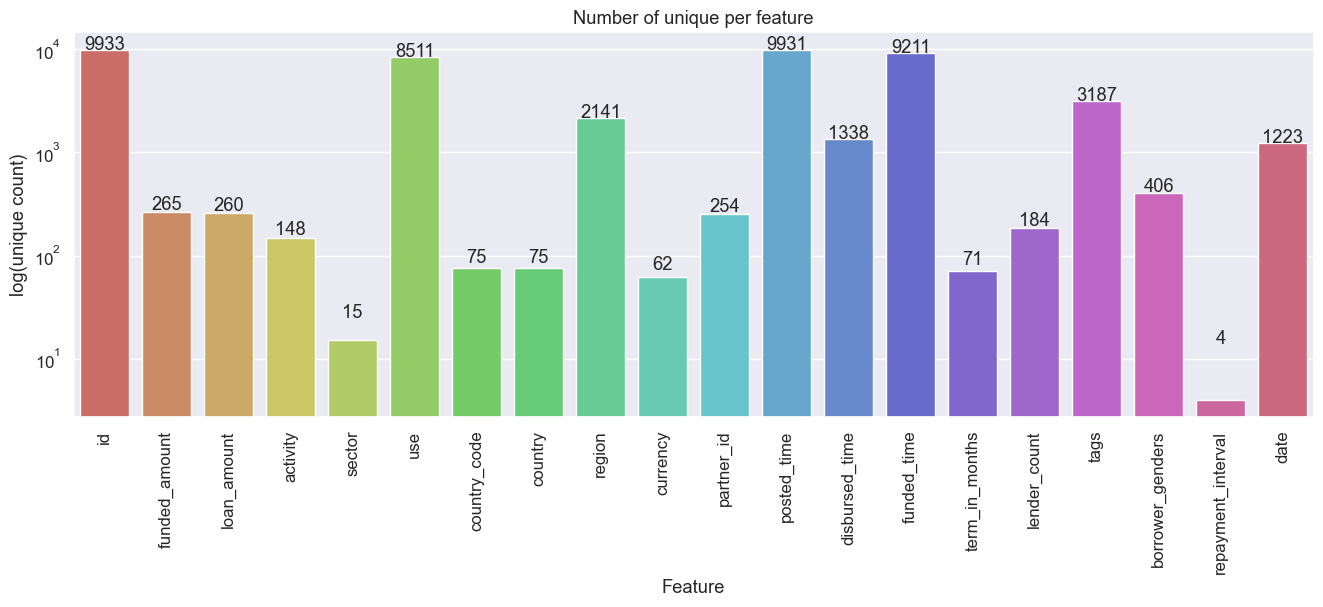

In [198]:
plt.figure(figsize=(16, 5))

cols = df_kiva.columns

uniques = [len(df_kiva[col].unique()) for col in cols]
sns.set(font_scale=1.1)
ax = sns.barplot(x=cols, y=uniques, palette='hls', log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Displaying Summary Statistics of Kiva Loans Dataset

In [199]:
print(df_kiva.describe())

                 id  funded_amount   loan_amount   partner_id  term_in_months  \
count  1.000000e+04   10000.000000  10000.000000  9802.000000    10000.000000   
mean   9.915459e+05     778.041500    831.102500   178.317078       13.875100   
std    1.950689e+05    1095.625589   1153.809755    94.458439        8.604412   
min    6.531570e+05       0.000000     25.000000     9.000000        2.000000   
25%    8.233655e+05     250.000000    275.000000   126.000000        8.000000   
50%    9.916100e+05     450.000000    500.000000   145.000000       13.000000   
75%    1.159928e+06     900.000000   1000.000000   204.000000       14.000000   
max    1.338808e+06   50000.000000  50000.000000   533.000000      122.000000   

       lender_count  
count  10000.000000  
mean      20.567800  
std       27.934918  
min        0.000000  
25%        7.000000  
50%       13.000000  
75%       25.000000  
max     1446.000000  


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Previewing the Top Rows of the Kiva Loans Dataset


In [200]:
df_kiva.head()

id  funded_amount  loan_amount        activity          sector  \
600866  1262236          150.0        150.0   General Store          Retail   
328811   975438          325.0        325.0   General Store          Retail   
392422  1039416          500.0        500.0         Farming     Agriculture   
336268   983265         1575.0       1575.0      Food Stall            Food   
199033  1087740          350.0        350.0  Transportation  Transportation   

                                                      use country_code  \
600866  to buy items to sell like canned goods, junk f...           PH   
328811  to purchase more groceries to sell in her gene...           PH   
392422  to purchase a solar light and gain access to c...           KE   
336268  to buy food ingredients like rice, sugar, bean...           TZ   
199033                    clear payment for my motorcycle           KE   

            country                         region currency  partner_id  \
600866  Philippines              Catbalogan, Samar      PHP       145.0   
328811  Philippines  San Carlos, Negros Occidental      PHP       145.0   
392422        Kenya                         Webuye      KES       202.0   
336268     Tanzania                  Dar es Salaam      TZS        87.0   
199033        Kenya                            NaN      KES         NaN   

                      posted_time             disbursed_time  \
600866  2017-03-21 05:20:08+00:00  2017-03-14 07:00:00+00:00   
328811  2015-11-09 08:18:36+00:00  2015-10-13 07:00:00+00:00   
392422  2016-03-16 09:06:28+00:00  2016-04-02 07:00:00+00:00   
336268  2015-11-23 07:28:45+00:00  2015-11-13 08:00:00+00:00   
199033  2015-02-26 14:16:01+00:00  2015-03-31 07:42:00+00:00   

                      funded_time  term_in_months  lender_count  \
600866  2017-03-25 15:40:38+00:00             8.0             5   
328811  2015-11-21 16:52:03+00:00             8.0             7   
392422  2016-03-24 07:14:18+00:00             9.0            19   
336268  2015-11-26 11:44:04+00:00             6.0            35   
199033  2015-03-26 17:33:51+00:00             7.0            19   

                                                     tags  \
600866                          #Parent, #Woman Owned Biz   
328811  #Repeat Borrower, #Woman Owned Biz, user_favorite   
392422  #Eco-friendly, #Sustainable Ag, #Technology, #...   
336268  #Parent, #Repeat Borrower, #Single Parent, #Wo...   
199033                                                NaN   

                                         borrower_genders repayment_interval  \
600866                                             female          irregular   
328811                                             female          irregular   
392422  female, female, male, male, female, female, fe...             bullet   
336268     female, female, female, female, female, female          irregular   
199033                                             female             weekly   

              date  
600866  2017-03-21  
328811  2015-11-09  
392422  2016-03-16  
336268  2015-11-23  
199033  2015-02-26

# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Analyzing Distributions of Funded and Loan Amounts in the Kiva Dataset

Description of distribution
       funded_amount   loan_amount
count   10000.000000  10000.000000
mean      778.041500    831.102500
std      1095.625589   1153.809755
min         0.000000     25.000000
25%       250.000000    275.000000
50%       450.000000    500.000000
75%       900.000000   1000.000000
max     50000.000000  50000.000000


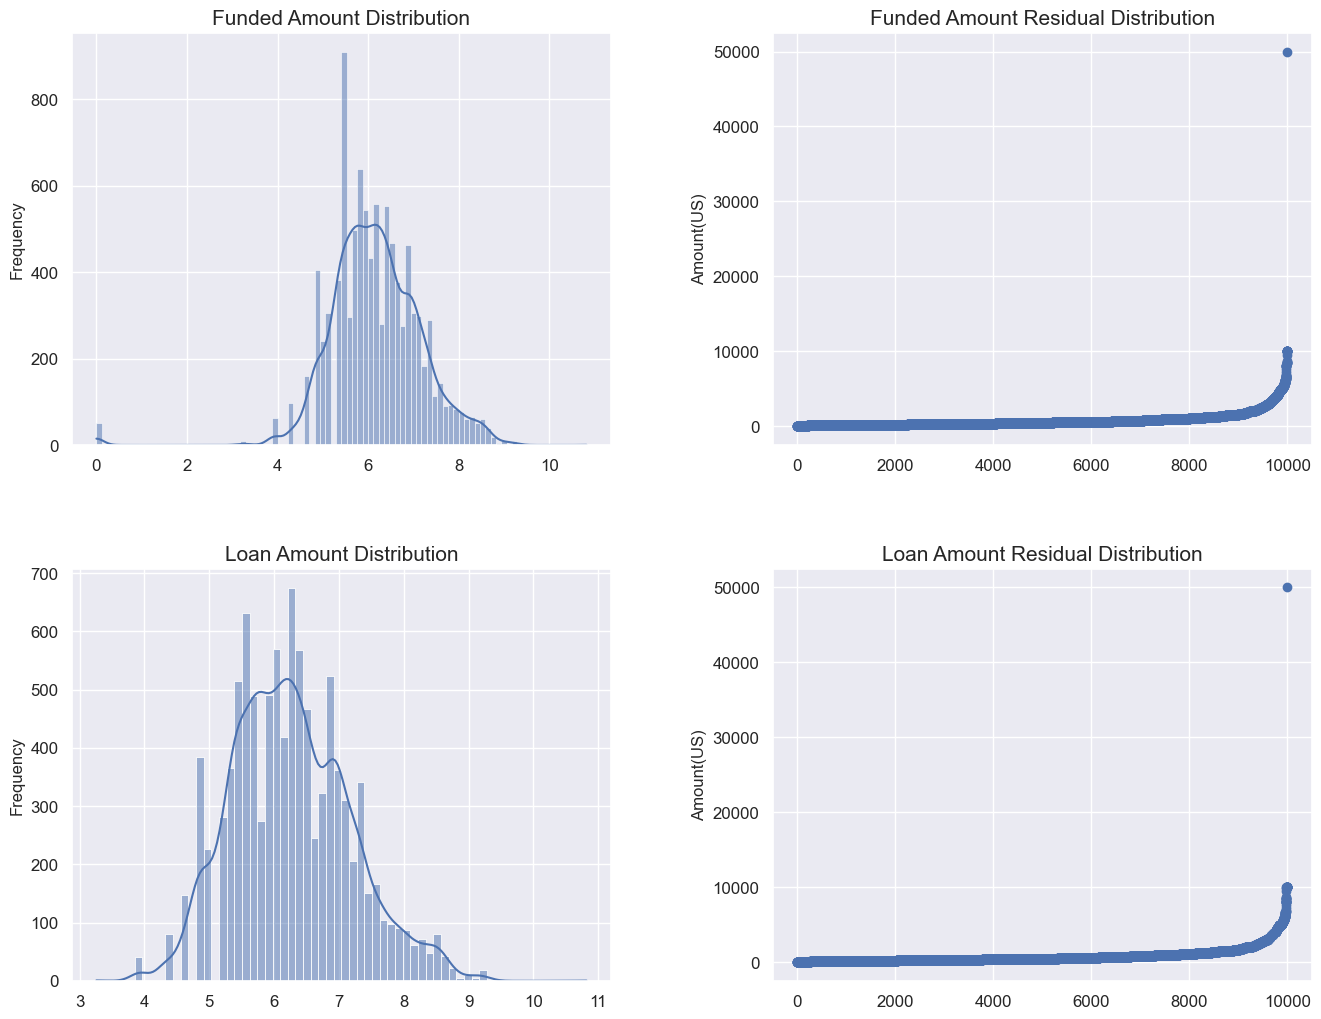

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Printing descriptive statistics for 'funded_amount' and 'loan_amount'
print("Description of distribution")
print(df_kiva[['funded_amount','loan_amount']].describe())

# Setting up the figure for multiple subplots
plt.figure(figsize=(16, 12))

# Plotting the distribution of 'funded_amount' using a histogram
plt.subplot(221)
g = sns.histplot(np.log(df_kiva['funded_amount'] + 1), kde=True)  # Log transformation to normalize data
g.set_title("Funded Amount Distribution", fontsize=15)  # Setting the title for the subplot
g.set_xlabel("")  # Removing the x-axis label for clarity
g.set_ylabel("Frequency", fontsize=12)  # Setting the y-axis label

# Creating a scatter plot to visualize the residual distribution of 'funded_amount'
plt.subplot(222)
g1 = plt.scatter(range(df_kiva.shape[0]), np.sort(df_kiva.funded_amount.values))  # Sorting values for a clearer distribution view
plt.title("Funded Amount Residual Distribution", fontsize=15)  # Setting the title for the subplot
plt.xlabel("")  # Removing the x-axis label for clarity
plt.ylabel("Amount(US)", fontsize=12)  # Setting the y-axis label

# Plotting the distribution of 'loan_amount' using a histogram
plt.subplot(223)
g2 = sns.histplot(np.log(df_kiva['loan_amount'] + 1), kde=True)  # Log transformation to normalize data
g2.set_title("Loan Amount Distribution", fontsize=15)  # Setting the title for the subplot
g2.set_xlabel("")  # Removing the x-axis label for clarity
g2.set_ylabel("Frequency", fontsize=12)  # Setting the y-axis label

# Creating a scatter plot to visualize the residual distribution of 'loan_amount'
plt.subplot(224)
g3 = plt.scatter(range(df_kiva.shape[0]), np.sort(df_kiva.loan_amount.values))  # Sorting values for a clearer distribution view
plt.title("Loan Amount Residual Distribution", fontsize=15)  # Setting the title for the subplot
plt.xlabel("")  # Removing the x-axis label for clarity
plt.ylabel("Amount(US)", fontsize=12)  # Setting the y-axis label

# Adjusting the layout for better readability and aesthetics
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.9)

# Displaying the plots
plt.show()



# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Visualizing Lender Count Distributions in Kiva Dataset Using Plotly

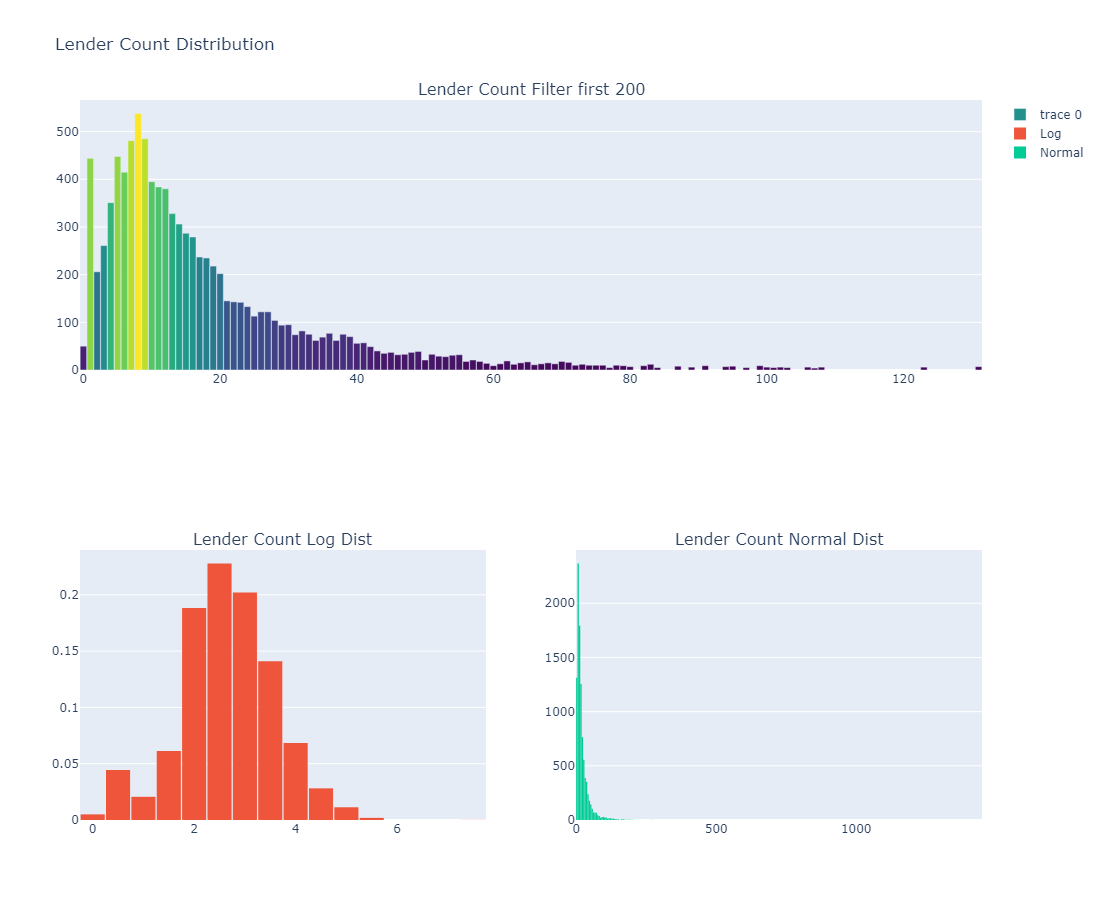

In [202]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as py
import plotly.offline as pyo

# Creating a histogram for the logarithmic transformation of 'lender_count'
trace0 = go.Histogram(x=np.log(df_kiva['lender_count'] + 1), 
                      name='Log',
                      nbinsx=30,  # Number of bins
                      histnorm='probability')  # Normalizing to show probabilities

# Creating a histogram for 'lender_count' without transformation
trace1 = go.Histogram(x=df_kiva['lender_count'], 
                      name='Normal', 
                      nbinsx=600)  # Number of bins adjusted due to untransformed data

# Creating a bar chart for the top 100 most common 'lender_count' values
trace2 = go.Bar(
    x=df_kiva["lender_count"].value_counts()[:100].index.values,  # X-axis shows lender count values
    y=df_kiva["lender_count"].value_counts()[:100].values,  # Y-axis shows frequency of each lender count
    marker=dict(
        color=df_kiva["lender_count"].value_counts()[:200].values,  # Color based on frequency
        colorscale='Viridis'  # Color scale for aesthetic mapping
    )
)

# Initializing the subplot layout with 2 rows and 2 columns
# The first plot spans two columns
fig = make_subplots(rows=2, cols=2, specs=[[{'colspan': 2}, None], [{}, {}]],
                    subplot_titles=('Lender Count Filter first 200',
                                    'Lender Count Log Dist',
                                    'Lender Count Normal Dist'))

# Adding each trace to the subplot grid
fig.add_trace(trace2, row=1, col=1)  # Bar chart in the first row, spanning two columns
fig.add_trace(trace0, row=2, col=1)  # Log histogram in the second row, first column
fig.add_trace(trace1, row=2, col=2)  # Normal histogram in the second row, second column

# Updating the overall layout of the figure
fig.update_layout(showlegend=True, title='Lender Count Distribution', 
                  bargap=0.05,  # Gap between bars of adjacent locations
                  height=900, width=900)  # Setting the size of the figure

# Displaying the figure in an offline Jupyter environment
pyo.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')


<p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Analyzing Loan Term Distribution in Kiva Dataset with Seaborn and Plotly

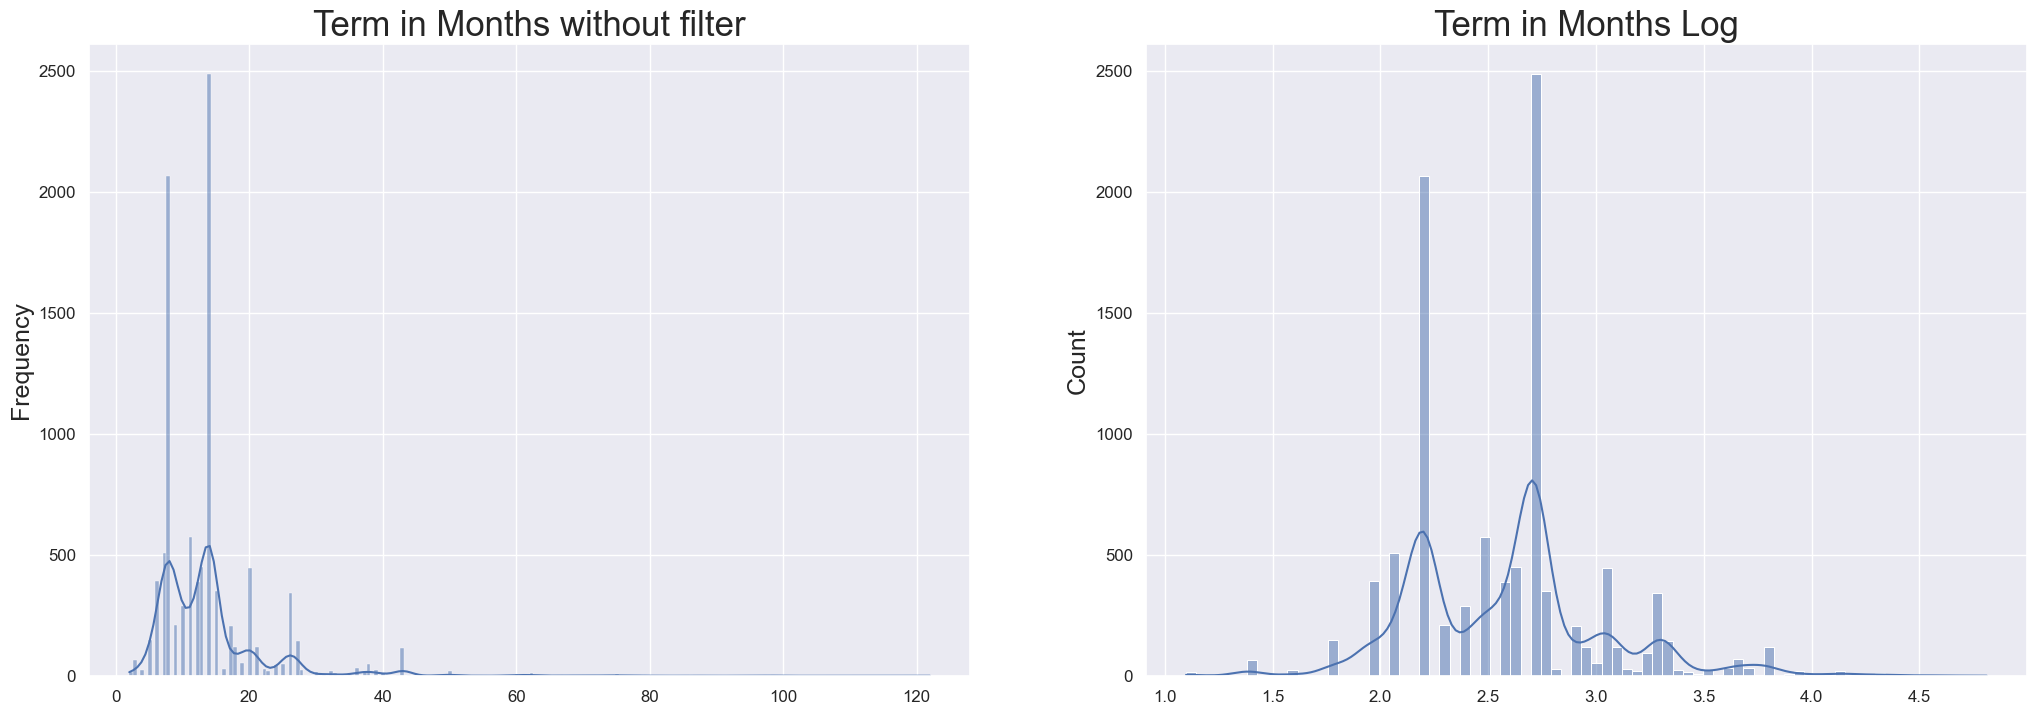

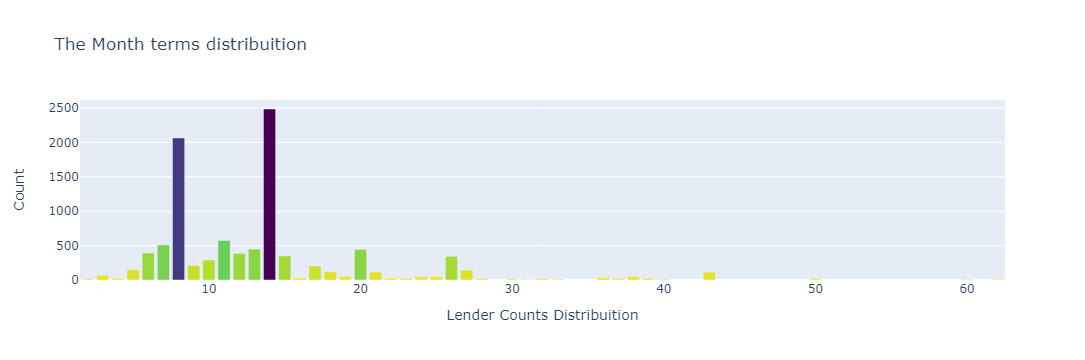

In [203]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import numpy as np

# Setting up the figure size for Seaborn plots
plt.figure(figsize=(25,8))

# Creating a histogram with a log transformation of 'term_in_months' to normalize the distribution
plt.subplot(122)  # Positioning this plot in the second column of the layout
g = sns.histplot(np.log(df_kiva['term_in_months'] + 1), kde=True)  # Applying log transformation and adding KDE
g.set_title("Term in Months Log", fontsize=25)  # Setting title
g.set_xlabel("")  # Removing the x-axis label for a cleaner look
g.set_ylabel("Count", fontsize=18)  # Setting y-axis label

# Creating a histogram of 'term_in_months' without any transformation to show the original distribution
plt.subplot(121)  # Positioning this plot in the first column of the layout
g1 = sns.histplot(df_kiva['term_in_months'], kde=True)  # Adding KDE to the histogram
g1.set_title("Term in Months without filter", fontsize=25)  # Setting title
g1.set_xlabel("")  # Removing the x-axis label for a cleaner look
g1.set_ylabel("Frequency", fontsize=18)  # Setting y-axis label

# Adjusting the layout for better visibility and aesthetics
plt.subplots_adjust(wspace=0.2, hspace=0.3, top=0.9)

# Preparing a Plotly bar chart to show the distribution of 'term_in_months'
trace0 = go.Bar(
    x=df_kiva["term_in_months"].value_counts()[:60].index.values,  # Taking the 60 most common terms
    y=df_kiva["term_in_months"].value_counts()[:60].values,  # Count of each term
    marker=dict(
        color=df_kiva["term_in_months"].value_counts()[:60].values,  # Coloring bars based on count
        colorscale='Viridis',  # Setting the color scale
        reversescale=True  # Reversing the color scale for aesthetic preference
    )
)

# Compiling the data for the Plotly plot
data = [trace0]

# Setting the layout for the Plotly plot, including titles and axis labels
layout = go.Layout(
    title='The Month Terms Distribution',
    xaxis=dict(
        title='Lender Counts Distribution'
    ),
    yaxis=dict(
        title='Count'
    )
)

# Creating the final figure object for Plotly
fig = go.Figure(data=data, layout=layout)

# Displaying the Seaborn plots
plt.show()

# Displaying the Plotly plot
py.iplot(fig, filename='term-months')


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Visualizing Sector Distribution and Mean Loan Amounts in Kiva Dataset

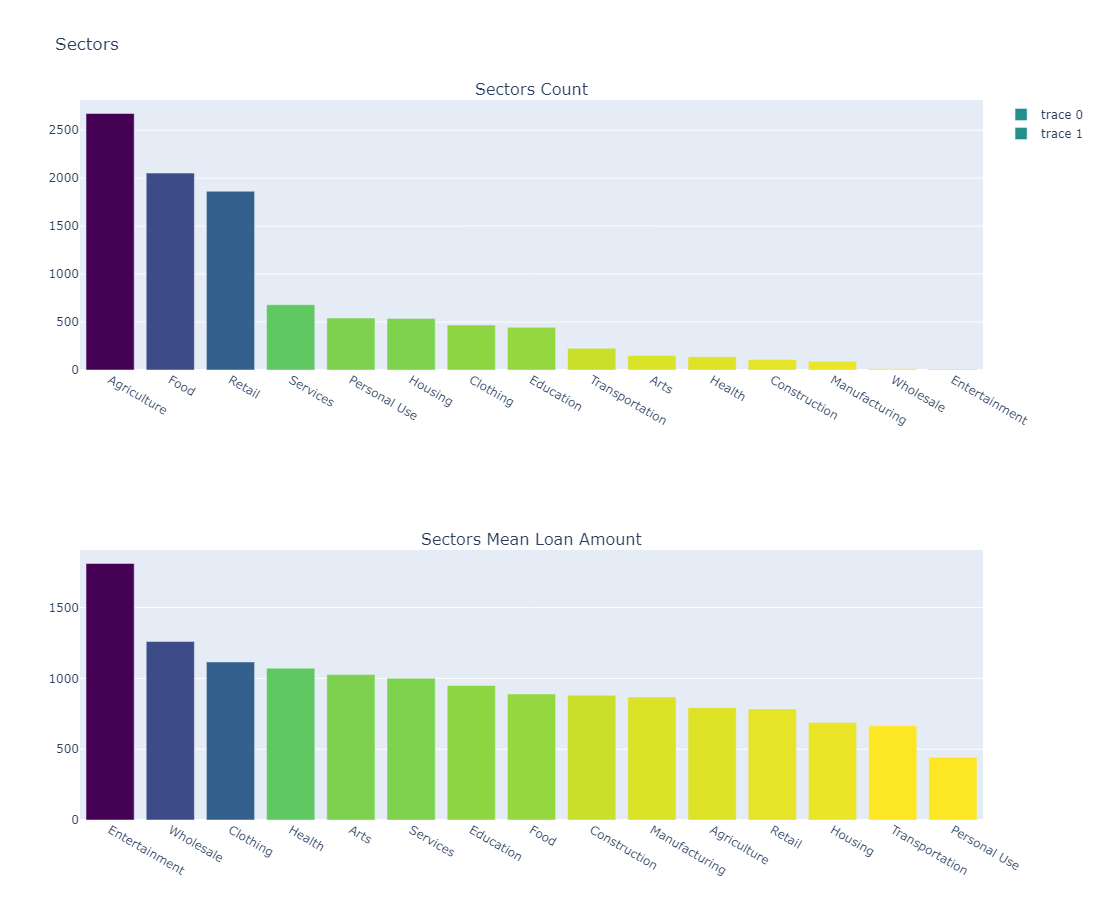

In [204]:
# Importing necessary libraries for data manipulation and interactive visualization
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py
import pandas as pd

# Extracting the 'sector' column from the Kiva dataset
sectors = df_kiva.sector

# Grouping the data by sector and calculating the mean loan amount for each sector,
# then sorting these means in descending order and selecting the top 30 sectors
sectors_amount = pd.DataFrame(df_kiva.groupby(['sector'])['loan_amount'].mean().sort_values(ascending=False)[:30]).reset_index()

# Creating a bar chart for sector counts using Plotly's Bar object
# The x-axis represents sector names, and the y-axis represents the count of loans in each sector
sectors_count = go.Bar(
    x=sectors.value_counts().index.values,
    y=sectors.value_counts().values,
    marker=dict(
        color=sectors.value_counts().values,  # Coloring the bars based on their count for visual emphasis
        colorscale='Viridis',  # Using the 'Viridis' colorscale
        reversescale=True  # Reversing the colorscale for aesthetic preference
    )
)

# Creating a bar chart for the mean loan amount by sector
# The x-axis represents sector names, and the y-axis represents the average loan amount for each sector
sectors_mean = go.Bar(
    x=sectors_amount.sector,
    y=sectors_amount.loan_amount,
    marker=dict(
        color=sectors.value_counts().values,  # Note: This line may not work as intended because the colors are based on sector counts, not mean values
        colorscale='Viridis',  # Using the 'Viridis' colorscale
        reversescale=True  # Reversing the colorscale for aesthetic preference
    )
)

# Creating a subplot layout with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=('Sectors Count',  # Title for the first plot
                                    'Sectors Mean Loan Amount'))  # Title for the second plot

# Adding the sector count bar chart to the first row of the subplot
fig.add_trace(sectors_count, row=1, col=1)
# Adding the mean loan amount bar chart to the second row of the subplot
fig.add_trace(sectors_mean, row=2, col=1)

# Updating the overall layout of the figure
fig.update_layout(height=900, width=800, title='Sectors')

# Displaying the interactive Plotly figure in the notebook
py.iplot(fig, filename='Sectors Count')


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Exploring Loan and Funded Amounts by Sector in Kiva Dataset

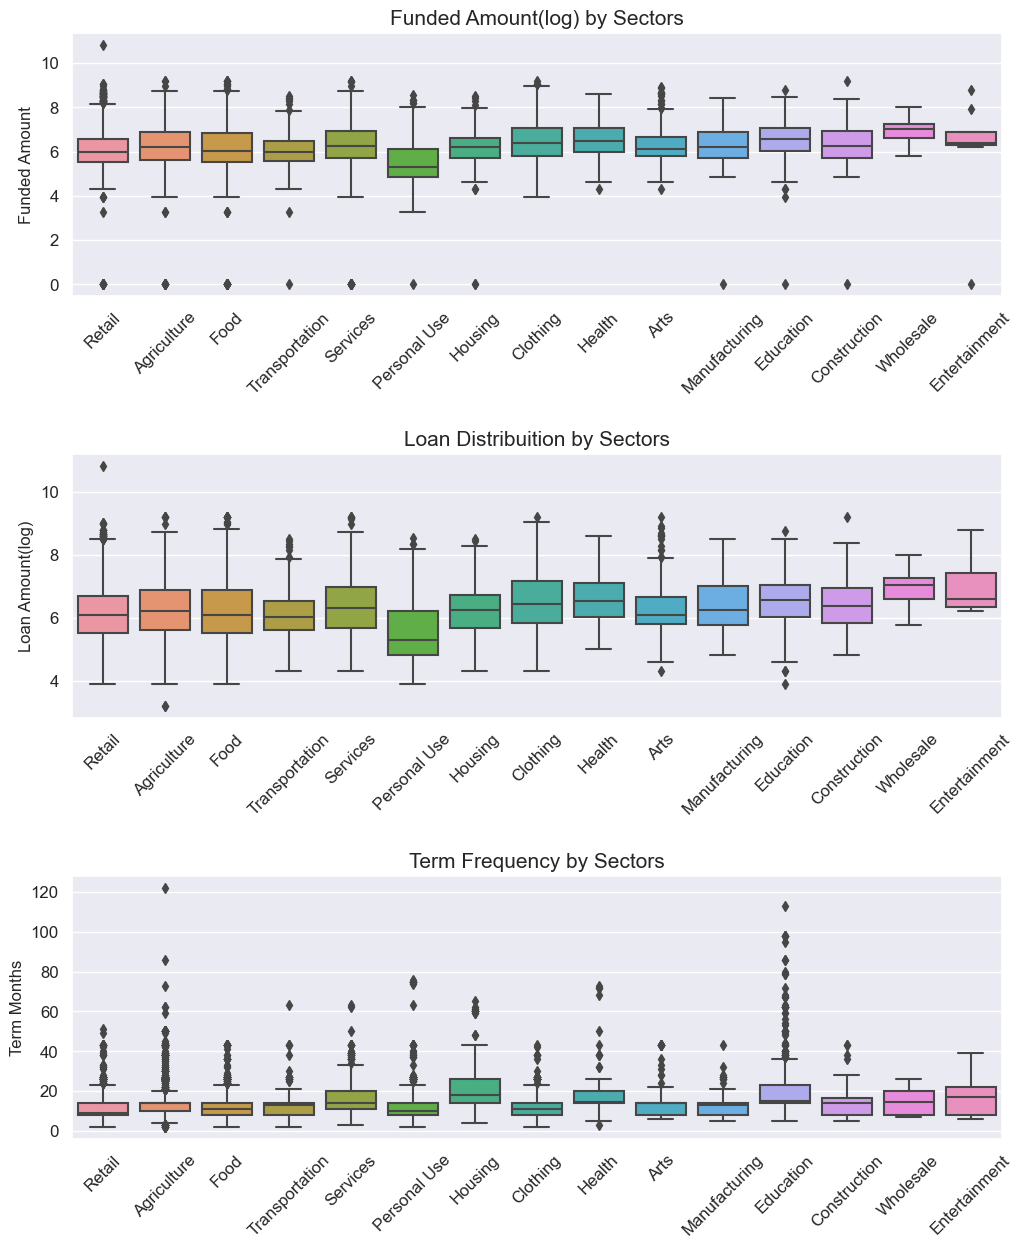

In [205]:
# Adding new features to the dataset
df_kiva['loan_amount_log'] = np.log(df_kiva['loan_amount'])  # Log-transforming loan amounts for normalization
df_kiva['funded_amount_log'] = np.log(df_kiva['funded_amount'] + 1)  # Log-transforming funded amounts; adding 1 to avoid log(0)
df_kiva['diff_fund'] = df_kiva['loan_amount'] / df_kiva['funded_amount']  # Calculating the ratio of loan amount to funded amount

# Setting up the figure size for the upcoming subplots
plt.figure(figsize=(12,14))

# Boxplot for the distribution of log-transformed loan amounts by sector
plt.subplot(312)  # Positioning this plot in the middle
g1 = sns.boxplot(x='sector', y='loan_amount_log', data=df_kiva)
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)  # Rotating x-axis labels for readability
g1.set_title("Loan Distribution by Sectors", fontsize=15)  # Setting the title
g1.set_xlabel("")  # Removing the x-axis label for a cleaner look
g1.set_ylabel("Loan Amount (log)", fontsize=12)  # Labeling the y-axis

# Boxplot for the distribution of log-transformed funded amounts by sector
plt.subplot(311)  # Positioning this plot at the top
g2 = sns.boxplot(x='sector', y='funded_amount_log', data=df_kiva)
g2.set_xticklabels(g2.get_xticklabels(), rotation=45)  # Rotating x-axis labels for readability
g2.set_title("Funded Amount (log) by Sectors", fontsize=15)  # Setting the title
g2.set_xlabel("")  # Removing the x-axis label for a cleaner look
g2.set_ylabel("Funded Amount (log)", fontsize=12)  # Labeling the y-axis

# Boxplot for the distribution of loan terms by sector
plt.subplot(313)  # Positioning this plot at the bottom
g3 = sns.boxplot(x='sector', y='term_in_months', data=df_kiva)
g3.set_xticklabels(g3.get_xticklabels(), rotation=45)  # Rotating x-axis labels for readability
g3.set_title("Term Frequency by Sectors", fontsize=15)  # Setting the title
g3.set_xlabel("")  # Removing the x-axis label for a cleaner look
g3.set_ylabel("Term Months", fontsize=12)  # Labeling the y-axis

# Adjusting subplot spacing for clarity and aesthetics
plt.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9)

# Displaying the plots
plt.show()


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Visualizing Top Activities in Kiva Loans Dataset

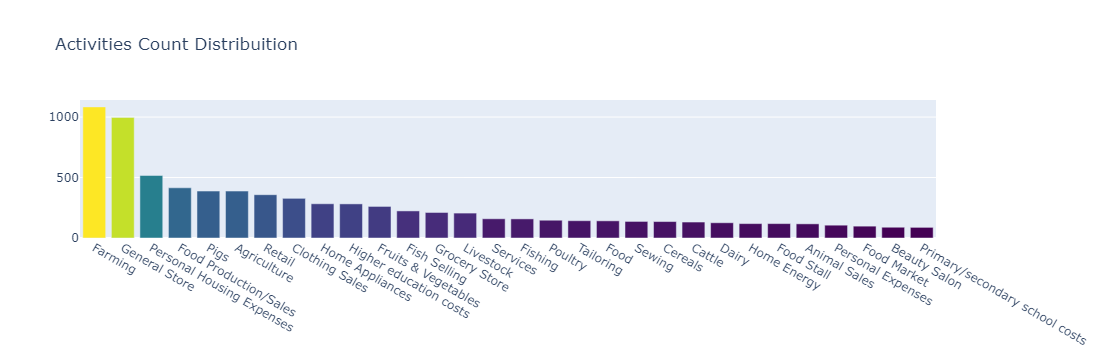

In [206]:
# Extracting the top 30 most common activities from the Kiva dataset
acitivies = df_kiva.activity.value_counts()[:30]

# Creating a bar chart to represent the counts of these activities
activities = go.Bar(
    x=acitivies.index.values,  # Activity names as x-axis labels
    y=acitivies.values,  # Corresponding counts of each activity as bar heights
    name='Activities Count',  # Legend name
    marker=dict(
        color=acitivies.values,  # Bar colors mapped to their counts for visual differentiation
        colorscale='Viridis',  # 'Viridis' colorscale for aesthetic appeal
        reversescale=False  # Keeping the default direction for the colorscale
    )
)

# Compiling the bar chart into a data list for plotting
data = [activities]

# Configuring the layout of the plot, including the title
layout = go.Layout(
    title='Activities Count Distribution'  # Title of the plot
)

# Creating a Figure object to encapsulate the data and layout
fig = go.Figure(data=data, layout=layout)

# Displaying the interactive plot in the Jupyter Notebook
py.iplot(fig, filename='term-months-count')


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Analyzing Mean Loan Amount by Activity Type in Kiva Loans Dataset

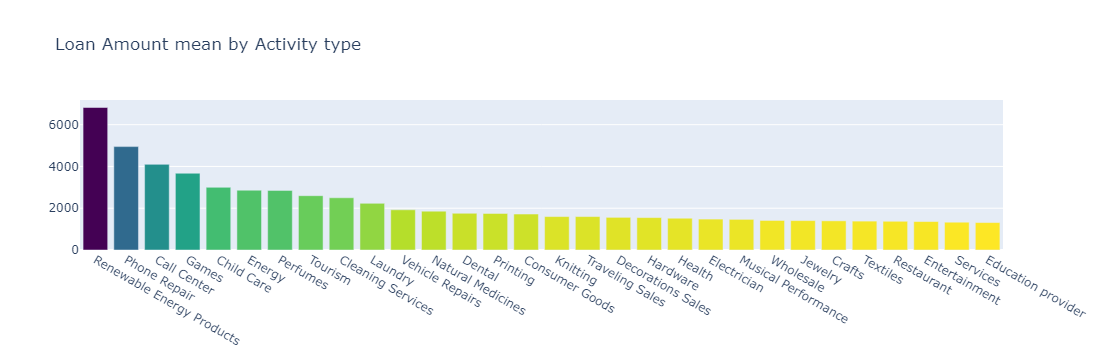

In [207]:
# Grouping Kiva loans by activity and calculating the mean loan amount for each, then sorting to get the top 30
activies_amount = pd.DataFrame(df_kiva.groupby(['activity'])['loan_amount'].mean().sort_values(ascending=False)[:30]).reset_index()

# Creating a Plotly bar chart for the average loan amounts by activity
activities_amount = go.Bar(
    x=activies_amount.activity,  # Setting the x-axis to activity names
    y=activies_amount.loan_amount,  # Setting the y-axis to the mean loan amounts
    name='Activities Amount',  # Naming the trace for legend
    marker=dict(
        color=activies_amount.loan_amount.values,  # Coloring the bars based on loan amount
        colorscale='Viridis',  # Setting the color scale to Viridis for aesthetic appeal
        reversescale=True  # Reversing the color scale to have higher amounts in darker colors
    )
)

# Compiling the data trace into a list, as Plotly figures can contain multiple traces
data = [activities_amount]

# Configuring the overall layout of the Plotly figure
layout = go.Layout(
    title='Loan Amount Mean by Activity Type'  # Setting the title of the plot
)

# Constructing the figure object with the specified data and layout
fig = go.Figure(data=data, layout=layout)

# Displaying the Plotly figure in the notebook
py.iplot(fig, filename='term-months-amount')


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Analyzing Activities Within Key Sectors of Kiva Loans

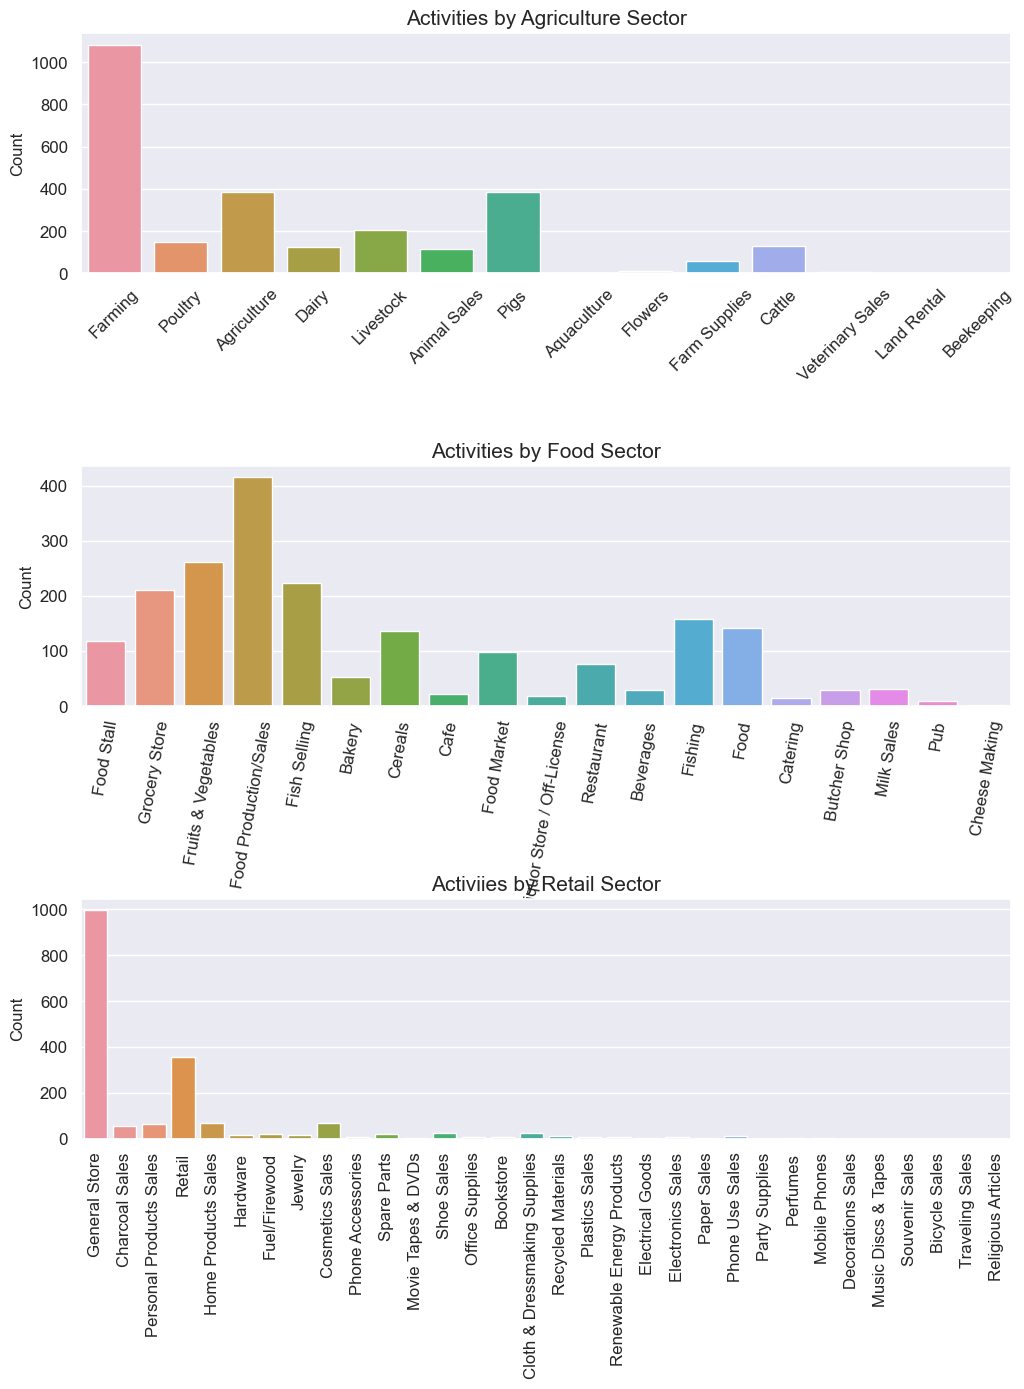

In [208]:
# Setting up the figure size for the plots
plt.figure(figsize=(12,14))

# Plotting activities within the Agriculture sector
plt.subplot(311)  # This specifies the first subplot in a 3-row by 1-column figure layout
g1 = sns.countplot(x='activity', data=df_kiva[df_kiva['sector'] == 'Agriculture'])  # Creates a count plot for activities in the Agriculture sector
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)  # Rotates x-axis labels for better readability
g1.set_title("Activities by Agriculture Sector", fontsize=15)  # Sets title for the plot
g1.set_xlabel("")  # Removes the x-axis label to avoid redundancy
g1.set_ylabel("Count", fontsize=12)  # Sets y-axis label

# Plotting activities within the Food sector
plt.subplot(312)  # This specifies the second subplot
g2 = sns.countplot(x='activity', data=df_kiva[df_kiva['sector'] == 'Food'])  # Creates a count plot for activities in the Food sector
g2.set_xticklabels(g2.get_xticklabels(),rotation=80)  # Rotates x-axis labels more due to potentially longer activity names
g2.set_title("Activities by Food Sector", fontsize=15)  # Sets title for the plot
g2.set_xlabel("")  # Removes the x-axis label to avoid redundancy
g2.set_ylabel("Count", fontsize=12)  # Sets y-axis label

# Plotting activities within the Retail sector
plt.subplot(313)  # This specifies the third subplot
g3 = sns.countplot(x='activity', data=df_kiva[df_kiva['sector'] == 'Retail'])  # Creates a count plot for activities in the Retail sector
g3.set_xticklabels(g3.get_xticklabels(),rotation=90)  # Rotates x-axis labels to vertical for maximum readability
g3.set_title("Activities by Retail Sector", fontsize=15)  # Sets title for the plot
g3.set_xlabel("")  # Removes the x-axis label to avoid redundancy
g3.set_ylabel("Count", fontsize=12)  # Sets y-axis label

# Adjusting the layout of the subplots for clarity and to prevent overlap
plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)

# Displaying the plots
plt.show()


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Distribution of Repayment Intervals in Kiva Loans Dataset

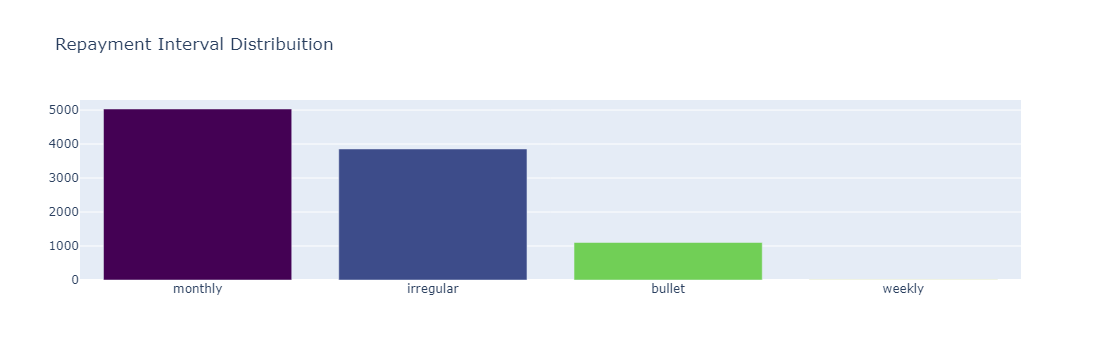

In [209]:
# Counting the occurrences of each repayment interval in the dataset
repayment = df_kiva.repayment_interval.value_counts()

# Creating a bar chart trace with the repayment intervals
trace = go.Bar(
    x=repayment.index,  # The categories of repayment intervals
    y=repayment.values,  # The count of loans for each repayment interval
    marker=dict(
        color=repayment.values,  # Coloring the bars based on the count of loans
        colorscale='Viridis',  # Using the 'Viridis' colorscale for aesthetic appeal
        reversescale=True  # Reversing the color scale to have darker colors for higher values
    ),
)

# Defining the layout of the plot, including the title
layout = go.Layout(
    title='Repayment Interval Distribution'  # Title of the plot
)

# Compiling the trace into a data list
data = [trace]

# Creating the figure object that includes the data and layout
fig = go.Figure(data=data, layout=layout)

# Displaying the figure in an interactive Plotly plot
py.iplot(fig, filename="RepaymentIntervals")


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Loan Amount Distribution by Repayment Interval in Kiva Dataset

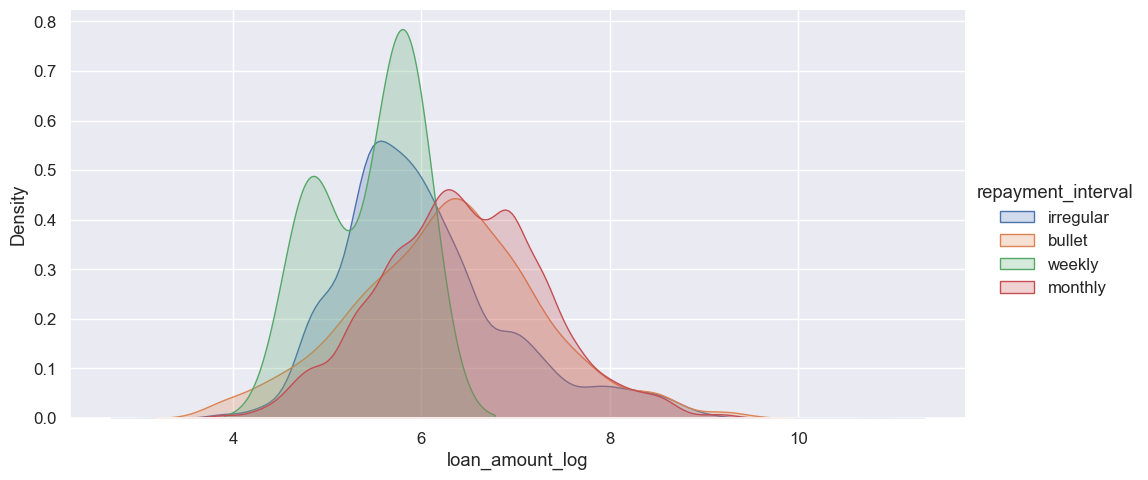

In [210]:
# Creating a FacetGrid object with 'repayment_interval' as the hue to differentiate distributions by repayment interval
(sns.FacetGrid(df_kiva, hue='repayment_interval', height=5, aspect=2)  # Setting the height and aspect ratio for clarity
 .map(sns.kdeplot, 'loan_amount_log', fill=True)  # Mapping a KDE plot for 'loan_amount_log' with fill under the curve
 .add_legend())  # Adding a legend to identify the repayment intervals

plt.show()  # Displaying the plot



# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Density Plot of Log Transformed Lender Count by Repayment Interval

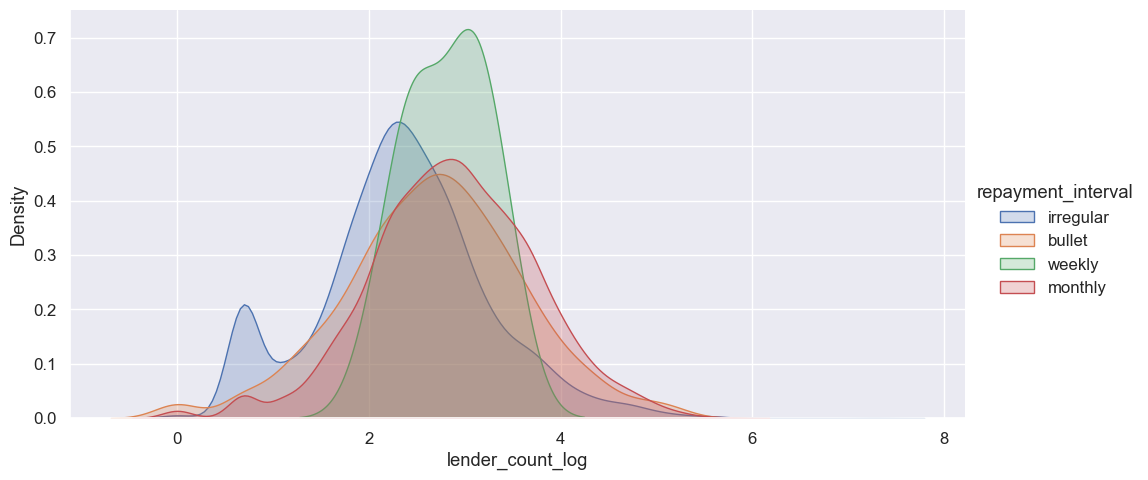

In [211]:
# Log transformation of lender count to handle skewness and better visualize the distribution
df_kiva['lender_count_log'] = np.log(df_kiva['lender_count'] + 1)

# Creating a FacetGrid to plot KDE (Kernel Density Estimate) plots of lender_count_log
# Separated by repayment intervals, with legend
(sns
  .FacetGrid(df_kiva, 
             hue='repayment_interval', 
             height=5, aspect=2)
  .map(sns.kdeplot, 'lender_count_log', fill=True)  # Plotting KDE plots
  .add_legend()  # Adding legend to the plot
)

# Displaying the plot
plt.show()



# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Sector vs. Repayment Interval Heatmap

In [212]:
# Defining the columns for the crosstabulation
sector_repay = ['sector', 'repayment_interval']

# Creating a color palette for the heatmap
cm = sns.light_palette("green", as_cmap=True)

# Generating a crosstabulation between sector and repayment interval,
# then applying a background gradient using the defined color palette
pd.crosstab(df_kiva[sector_repay[0]], df_kiva[sector_repay[1]]).style.background_gradient(cmap = cm)


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Renaming Countries in DataFrame

In [213]:
# Renaming country names in the DataFrame where 'The Democratic Republic of the Congo' is changed to 'Republic of Congo'
df_kiva.loc[df_kiva.country == 'The Democratic Republic of the Congo', 'country'] = 'Republic of Congo'

# Renaming country names in the DataFrame where 'Saint Vincent and the Grenadines' is changed to 'S Vinc e Grenadi'
df_kiva.loc[df_kiva.country == 'Saint Vincent and the Grenadines', 'country'] = 'S Vinc e Grenadi'


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Frequency Loan Distribution by Country

In [214]:
# Calculating the counts of loans by country and selecting the top 40
country_counts = df_kiva['country'].value_counts().head(40)

# Creating a horizontal bar plot
countrys_loan = go.Bar(
    x=country_counts.values[::-1],  # Reversing values to display in descending order
    y=country_counts.index[::-1],   # Reversing index to match the values
    orientation='h',  # Horizontal orientation
    marker=dict(
        color=country_counts.values[::-1],  # Reversing values for color mapping
        colorscale='Viridis'  # Color scale for the bar plot
    ),
)

# Defining layout settings for the plot
layout = go.Layout(
    title="Frequency Loan Distribution by Country",  # Title of the plot
    width=700,  # Width of the plot
    height=900,  # Height of the plot
)

# Combining data and layout into a Figure object
data = [countrys_loan]
fig = go.Figure(data=data, layout=layout)

# Plotting the figure using Plotly and generating an interactive plot
py.iplot(fig, filename="Country-counts")


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Top 20 Countries Loan Distribution

In [215]:
# Filtering data for the top 20 countries by loan count and loan amount less than 20000
trace = go.Box(
    x=df_kiva.loc[(df_kiva.country.isin(country_counts[:20].index.values)) & \
                             (df_kiva['loan_amount'] < 20000)]['country'],
    y=df_kiva.loc[(df_kiva.country.isin(country_counts[:20].index.values)) & \
                  (df_kiva['loan_amount'] < 20000)]['loan_amount'], 
    name="TOP 20 Countries Loan Distribution", showlegend=False)

# Combining trace into data list
data = [trace]

# Defining layout settings for the plot
layout = go.Layout(
    yaxis=dict(
        title="Loan Amount Distribution"  # Title for y-axis
    ),
    xaxis=dict(
        title="TOP 20 Countries"  # Title for x-axis
    ),
    title="TOP 20 Countries Loan Distribution"  # Title of the plot
)

# Combining data and layout into a Figure object
fig = go.Figure(data=data, layout=layout)

# Plotting the figure using Plotly and generating an interactive plot
py.iplot(fig)


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Top 10 Loan Uses in Brazil

In [216]:
import plotly.graph_objs as go
import plotly.offline as py

# Filtering loan uses for Brazil
philip_uses = df_kiva['use'][df_kiva['country'] == 'Brazil']

# Calculating percentage of each loan use and selecting top 10
percent = round(philip_uses.value_counts() / len(philip_uses) * 100, 2)[:10]

# Creating a pie chart
pie_philip = go.Pie(labels=percent.keys(), values=percent.values, hoverinfo='label+percent', 
                textfont=dict(size=18, color='#000000'))

data = [pie_philip]

# Defining layout settings for the plot
layout = go.Layout(width=900, height=800, title='', titlefont=dict(size=20), 
                   legend=dict(x=0.1, y=1.2))  # Adjust the y value here

# Combining data and layout into a Figure object
fig = go.Figure(data=data, layout=layout)

# Plotting the figure using Plotly and generating an interactive plot
py.iplot(fig)


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Mean Loan Amount by Country

In [217]:
# Calculating mean loan amount by country and selecting top 30
countrys_amount = pd.DataFrame(df_kiva.groupby(['country'])['loan_amount'].mean().sort_values(ascending=False)[:30]).reset_index()

# Creating a bar plot
countrys_amount = go.Bar(
    x=countrys_amount.country,
    y=countrys_amount.loan_amount,
    name='Activities Amount',
    marker=dict(
        color=countrys_amount.loan_amount.values,
        colorscale='Viridis',
        reversescale=True
    )
)

data = [countrys_amount]

# Defining layout settings for the plot
layout = go.Layout(
    title='Loan Amount Mean by Country'  # Title of the plot
)

# Combining data and layout into a Figure object
fig = go.Figure(data=data, layout=layout)

# Plotting the figure using Plotly and generating an interactive plot
py.iplot(fig, filename='country-mean-amount')


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Data for Cote D'Ivoire

In [218]:
# Filtering the DataFrame for loans in Cote D'Ivoire
df_kiva[df_kiva['country'] == "Cote D'Ivoire"]


Empty DataFrame
Columns: [id, funded_amount, loan_amount, activity, sector, use, country_code, country, region, currency, partner_id, posted_time, disbursed_time, funded_time, term_in_months, lender_count, tags, borrower_genders, repayment_interval, date, loan_amount_log, funded_amount_log, diff_fund, lender_count_log]
Index: []

[0 rows x 24 columns]

The most frequent Regions with more projects is really of poor regions... 
- One interesting information is that almost all borrowers values means are under $ 10k

# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Displaying the Head of DataFrame df_kiva_loc

In [219]:
# Displaying the first few rows of the DataFrame df_kiva_loc
df_kiva_loc.head()


LocationName  ISO        country    region  \
2588                      NaN  NaN            NaN       NaN   
2043                      NaN  NaN            NaN       NaN   
671            Gombe, Nigeria  NGA        Nigeria     Gombe   
1445                      NaN  NaN            NaN       NaN   
162   Nord-Est, Cote d'Ivoire  CIV  Cote d'Ivoire  Nord-Est   

            world_region    MPI                              geo        lat  \
2588                 NaN    NaN                 (1000.0, 1000.0)        NaN   
2043                 NaN    NaN                 (1000.0, 1000.0)        NaN   
671   Sub-Saharan Africa  0.471          (10.279142, 11.1730615)  10.279142   
1445                 NaN    NaN                 (1000.0, 1000.0)        NaN   
162   Sub-Saharan Africa  0.374  (5.308612999999999, -3.9468284)   5.308613   

            lon  
2588        NaN  
2043        NaN  
671   11.173061  
1445        NaN  
162   -3.946828

# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Top 50 Countries Around the World with Loans

In [220]:
# Creating a horizontal bar plot to visualize the loan counts for the top 50 countries in the DataFrame df_kiva_loc
data = go.Bar(
    x=df_kiva_loc.country.value_counts().values[50::-1],  # Values for x-axis (loan counts), reversed for descending order
    y=df_kiva_loc.country.value_counts().index[50::-1],   # Index for y-axis (country names), reversed for descending order
    orientation='h',  # Horizontal orientation
    marker=dict(
        color=df_kiva_loc.country.value_counts().values[50::-1],  # Colors based on loan counts, reversed for descending order
        colorscale='Viridis'  # Color scale for the bar plot
    ),
)

# Defining layout settings for the plot
layout = go.Layout(
    title='TOP 50 Countries Around the World with Loans',  # Title of the plot
    width=800,  # Width of the plot
    height=1000,  # Height of the plot
)

# Combining data and layout into a Figure object
figure = go.Figure(data=[data], layout=layout)

# Plotting the figure using Plotly and generating an interactive plot
py.iplot(figure, filename="Loans-country-count")


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">World Regions Distribution

In [221]:
# Calculating the loan counts for each world region in the DataFrame df_kiva_loc
regions = df_kiva_loc['world_region'].value_counts()

# Creating a vertical bar plot to visualize the loan counts for each world region
countrys_loan = go.Bar(
    x=regions.index,  # X-axis: world region names
    y=regions.values,  # Y-axis: loan counts for each world region
    orientation='v',  # Vertical orientation
    marker=dict(
        color=regions.values,  # Colors based on loan counts
        colorscale='Viridis',  # Color scale for the bar plot
        reversescale=True  # Reversing the color scale
    ),
)

# Defining layout settings for the plot
layout = go.Layout(
    title="World Regions Distribution",  # Title of the plot
    width=900,  # Width of the plot
    height=500,  # Height of the plot
)

# Combining data and layout into a Figure object
data = [countrys_loan]
fig = go.Figure(data=data, layout=layout)

# Plotting the figure using Plotly and generating an interactive plot
py.iplot(fig)


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Loan Counts by Country

In [222]:
# Calculating the counts of loans for each country in the DataFrame df_kiva_loc
maps = pd.DataFrame(df_kiva_loc['country'].value_counts()).reset_index()

# Renaming columns for clarity
maps.columns=['country', 'counts']

# Resetting index and dropping the previous index column
maps = maps.reset_index().drop('index', axis=1)


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Counting of Loans Per Country

In [223]:
# Creating a choropleth map to visualize the counts of loans per country
data = [ dict(
        type = 'choropleth',
        locations = maps['country'],  # Country codes or names
        locationmode = 'country names',  # Using country names
        z = maps['counts'],  # Values to be visualized (loan counts)
        text = maps['country'],  # Text to be displayed on hover
        autocolorscale = False,  # Disabling automatic color scale
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',  # Color of the map borders
                width = 0.5  # Width of the map borders
            ) ),
        colorbar = dict(
            autotick = False,  # Disabling automatic tick generation
            tickprefix = '',  # Prefix for color bar ticks
            title = 'Number of Loans'),  # Title of the color bar
      ) ]

# Defining layout settings for the map
layout = dict(
    title = 'Counting of Loans Per Country',  # Title of the map
    geo = dict(
        showframe = False,  # Hiding the frame around the map
        showcoastlines = True,  # Showing coastlines
        projection = dict(
            type = 'Mercator'  # Projection type for the map
        )
    )
)

# Combining data and layout into a Figure object
figure = dict( data=data, layout=layout )

# Plotting the figure using Plotly and generating an interactive plot
py.iplot(figure, validate=False, filename='map-countrys-count')


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Country vs. Repayment Interval Heatmap

In [224]:
# Defining the columns for the crosstabulation
country_repayment = ['country', 'repayment_interval']

# Creating a color palette for the heatmap
cm = sns.light_palette("green", as_cmap=True)

# Generating a crosstabulation between country and repayment interval,
# then applying a background gradient using the defined color palette
pd.crosstab(df_kiva[country_repayment[0]], df_kiva[country_repayment[1]]).style.background_gradient(cmap=cm)


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Country vs. Sector Heatmap

In [225]:
# Defining the columns for the crosstabulation
country_sector = ['country', 'sector']

# Creating a color palette for the heatmap
cm = sns.light_palette("green", as_cmap=True)

# Generating a crosstabulation between country and sector,
# then applying a background gradient using the defined color palette
pd.crosstab(df_kiva[country_sector[0]], df_kiva[country_sector[1]]).style.background_gradient(cmap=cm)


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">The 35 Most Frequently Used Currencies at the Platform

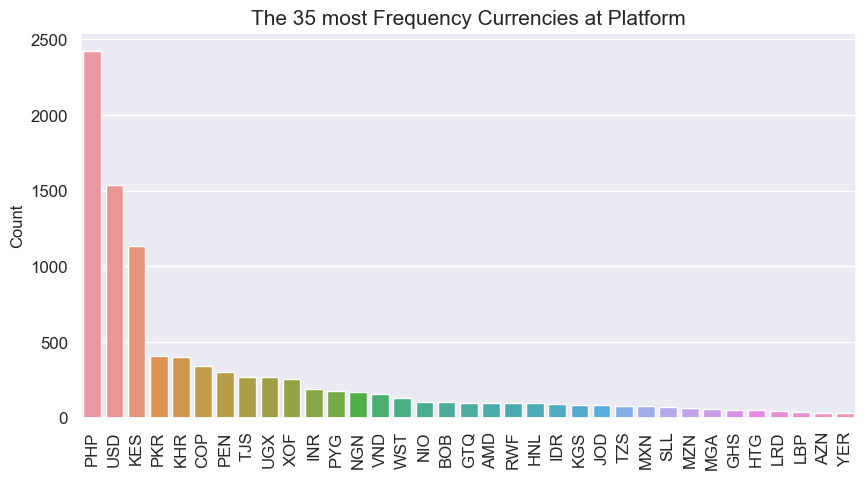

In [226]:
# Calculating the counts of currencies in the DataFrame df_kiva
currency = df_kiva['currency'].value_counts()

# Creating a bar plot to visualize the 35 most frequent currencies at the platform
plt.figure(figsize=(10,5))  # Setting the figure size
g = sns.barplot(x=currency.index[:35], y=currency.values[:35])  # Creating the bar plot
g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Rotating x-axis labels for better readability
g.set_title("The 35 Most Frequently Used Currencies at the Platform", fontsize=15)  # Setting the title
g.set_xlabel("")  # Setting the x-axis label
g.set_ylabel("Count", fontsize=12)  # Setting the y-axis label

plt.show()  # Displaying the plot


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">The 20 Most Frequently Used Currencies at the Platform

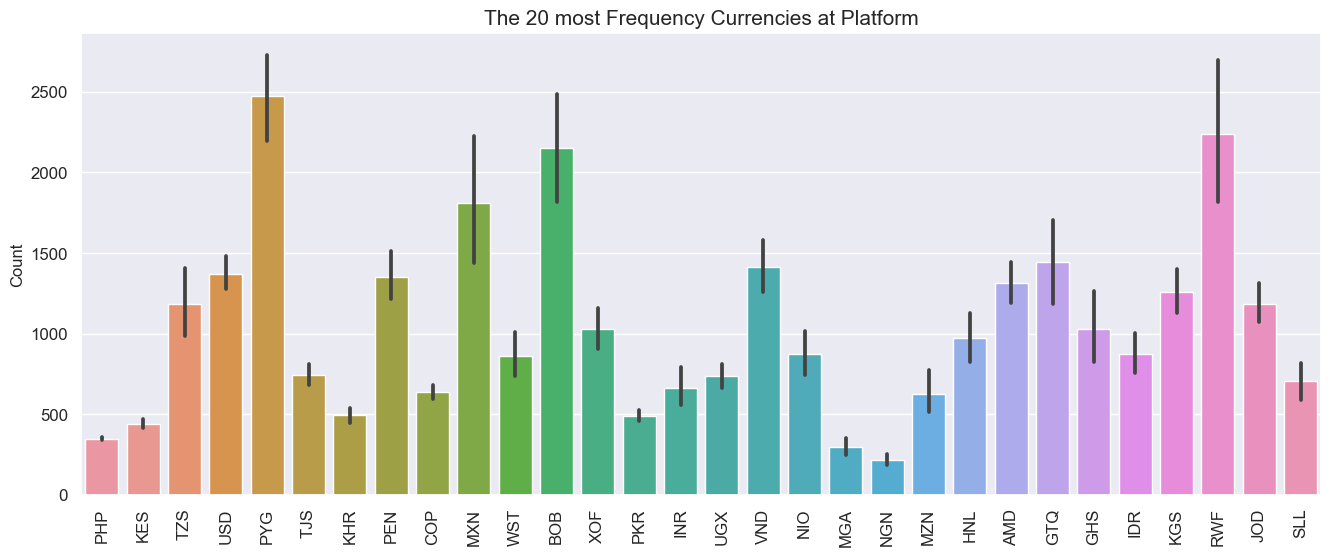

In [227]:
# Setting the figure size
plt.figure(figsize=(16,6))

# Creating a bar plot to visualize the loan amounts for the 20 most frequent currencies at the platform
g = sns.barplot(x='currency', y="loan_amount", 
                data=df_kiva.loc[(df_kiva.currency.isin(currency[:30].index.values))])

# Rotating x-axis labels for better readability
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Setting the title
g.set_title("The 20 Most Frequently Used Currencies at the Platform", fontsize=15)

# Setting the x-axis label
g.set_xlabel("")

# Setting the y-axis label
g.set_ylabel("Count", fontsize=12)

plt.show()  # Displaying the plot


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Gender of Borrowers

In [228]:
# Converting borrower genders to string type
df_kiva.borrower_genders = df_kiva.borrower_genders.astype(str)

# Splitting borrower genders into separate columns
df_sex = pd.DataFrame(df_kiva.borrower_genders.str.split(',').tolist())

# Creating a new column 'sex_borrowers' to store the primary gender of borrowers
df_kiva['sex_borrowers'] = df_sex[0]

# Replacing 'nan' values with NaN in the 'sex_borrowers' column
df_kiva.loc[df_kiva.sex_borrowers == 'nan', 'sex_borrowers'] = np.nan


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Mean Loan Amount by Borrower Gender

In [229]:
# Calculating the mean loan amount for each gender of borrowers
sex_mean = pd.DataFrame(df_kiva.groupby(['sex_borrowers'])['loan_amount'].mean().sort_values(ascending=False)).reset_index()


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Exploring the Genders by Repayment Interval

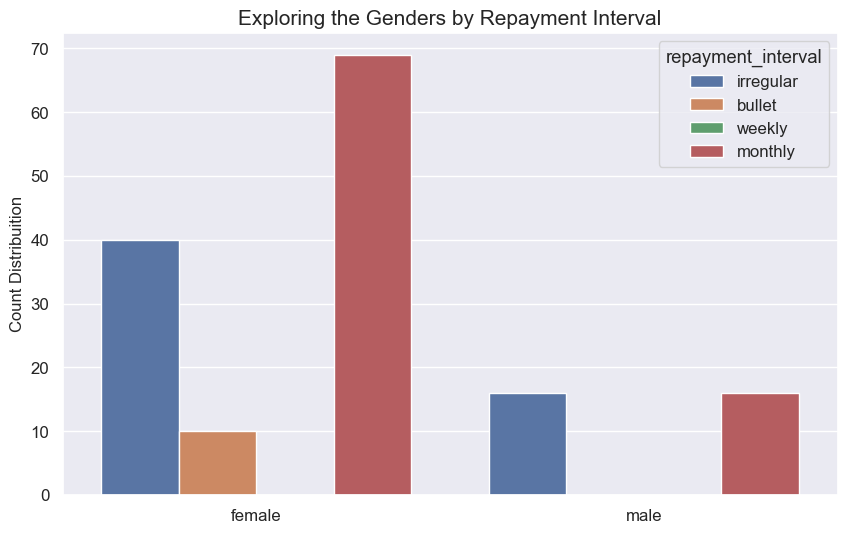

In [230]:
# Setting the figure size
plt.figure(figsize=(10,6))

# Creating a count plot to explore the genders by repayment interval
g = sns.countplot(x='sex_borrowers', data=df_kiva, 
                  hue='repayment_interval')

# Setting the title
g.set_title("Exploring the Genders by Repayment Interval", fontsize=15)

# Setting the x-axis label
g.set_xlabel("")

# Setting the y-axis label
g.set_ylabel("Count Distribution", fontsize=12)

plt.show()  # Displaying the plot


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Distribution and Loan Amount Mean

Gender Counting and Loan Amount Mean
                  mean  count
sex_borrowers                
female         1004.20    119
male            828.12     32


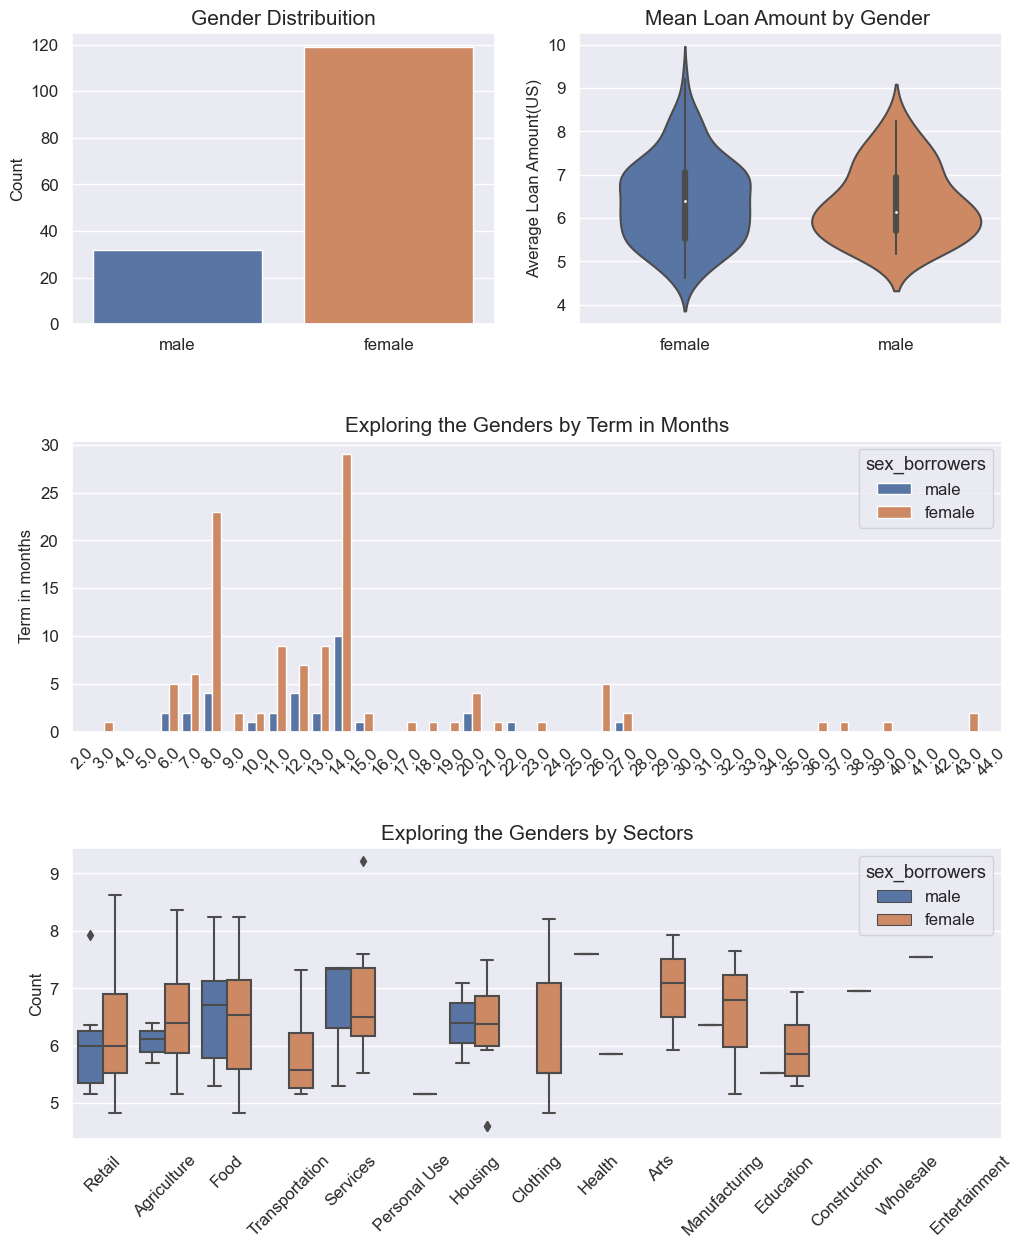

Gender Percentual Average
sex_borrowers
female    1.0
male      0.0
Name: count, dtype: float64 2


In [231]:
# Printing gender counting and loan amount mean
print("Gender Counting and Loan Amount Mean")
print(round(df_kiva.groupby('sex_borrowers')['loan_amount'].agg(['mean','count']),2))

# Creating subplots for visualization
plt.figure(figsize=(12,14))

# Subplot 1: Gender Distribution
plt.subplot(321)
g = sns.countplot(x='sex_borrowers', data=df_kiva, 
              order=['male','female'])
g.set_title("Gender Distribution", fontsize=15)
g.set_xlabel("")
g.set_ylabel("Count", fontsize=12)

# Subplot 2: Mean Loan Amount by Gender
plt.subplot(322)
g1 = sns.violinplot(x='sex_borrowers', y='loan_amount_log', data=df_kiva)
g1.set_title("Mean Loan Amount by Gender", fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("Average Loan Amount (US)", fontsize=12)

# Subplot 3: Exploring the Genders by Sectors
plt.subplot(313)
g2 = sns.boxplot(x='sector', y='loan_amount_log', data=df_kiva, 
              hue='sex_borrowers', hue_order=['male','female'])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("Exploring the Genders by Sectors", fontsize=15)
g2.set_xlabel("")
g2.set_ylabel("Count", fontsize=12)

# Subplot 4: Exploring the Genders by Term in Months
plt.subplot(312)
g3 = sns.countplot(x='term_in_months',data=df_kiva[df_kiva['term_in_months'] < 45], 
              hue='sex_borrowers', hue_order=['male','female'])
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
g3.set_title("Exploring the Genders by Term in Months", fontsize=15)
g3.set_xlabel("")
g3.set_ylabel("Term in Months", fontsize=12)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)

plt.show()

# Printing gender percentage average
print("Gender Percentage Average")
print(round(df_kiva['sex_borrowers'].value_counts() / len(df_kiva['sex_borrowers']) * 100), 2)


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Data Transformation: Date Columns

In [232]:
import pandas as pd

# Convert to datetime if needed
df_kiva['date'] = pd.to_datetime(df_kiva['date'])
df_kiva['funded_time'] = pd.to_datetime(df_kiva['funded_time'])
df_kiva['posted_time'] = pd.to_datetime(df_kiva['posted_time'])

# Convert datetime columns to strings
df_kiva['date_month_year'] = df_kiva['date'].dt.strftime("%Y-%m")
df_kiva['funded_year'] = df_kiva['funded_time'].dt.strftime("%Y")
df_kiva['posted_month_year'] = df_kiva['posted_time'].dt.strftime("%Y-%m")

df_kiva['date_year'] = df_kiva['date'].dt.strftime("%Y")
df_kiva['funded_year'] = df_kiva['funded_time'].dt.strftime("%Y")
df_kiva['posted_year'] = df_kiva['posted_time'].dt.strftime("%Y")

df_kiva['months'] = df_kiva['funded_time'].dt.month


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Months Analysis

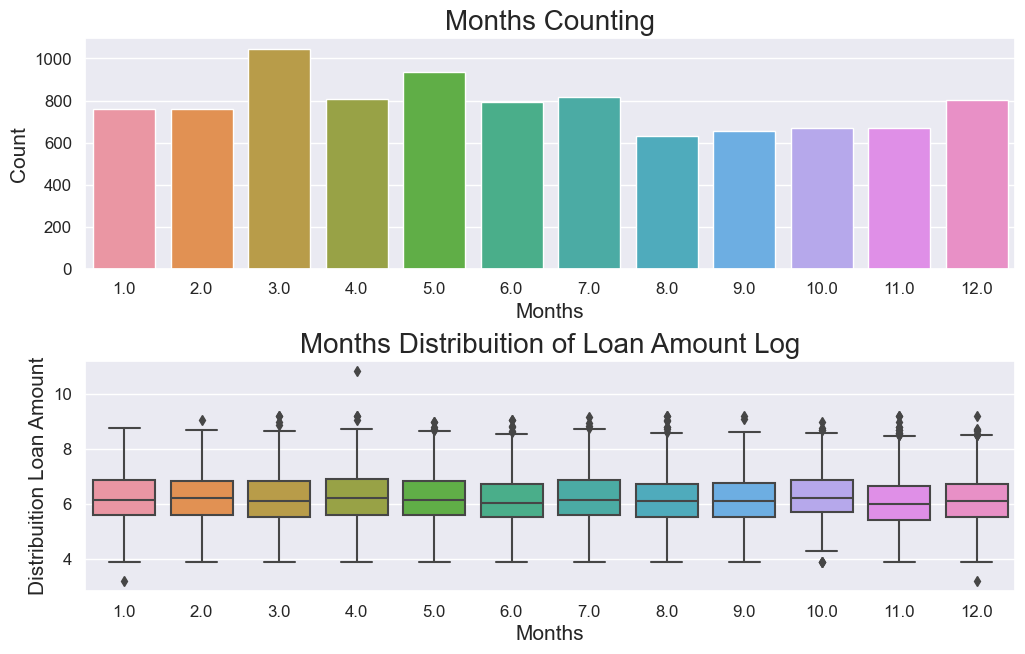

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))

# Subplot 1: Months Counting
plt.subplot(211)
g = sns.countplot(x='months', data=df_kiva)
g.set_title("Months Counting", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

# Subplot 2: Months Distribution of Loan Amount Log
plt.subplot(212)
g2 = sns.boxplot(x='months', y='loan_amount_log', data=df_kiva)
g2.set_title("Months Distribution of Loan Amount Log", fontsize=20)
g2.set_xlabel("Months", fontsize=15)
g2.set_ylabel("Distribution Loan Amount", fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)

plt.show()


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Analysis by Month-Year

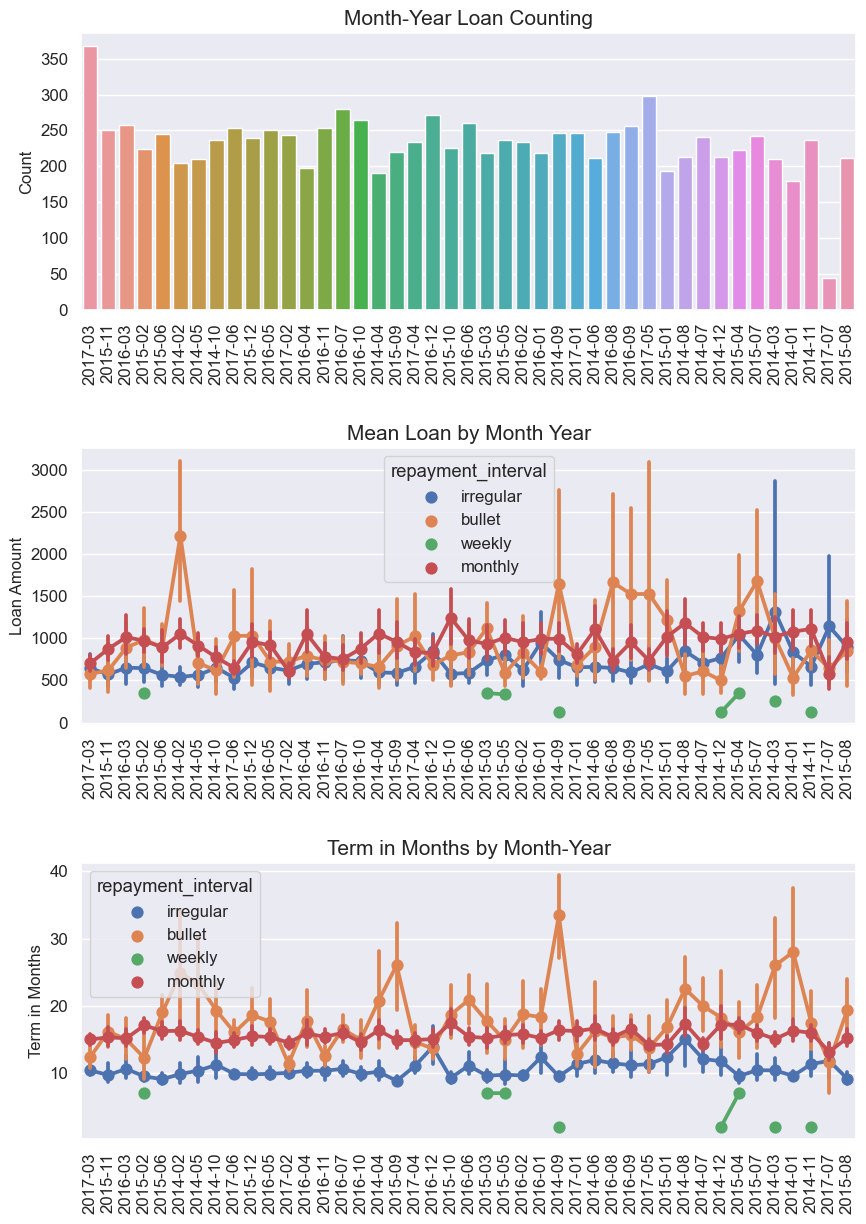

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,14))

# Subplot 1: Month-Year Loan Counting
plt.subplot(311)
g = sns.countplot(x='date_month_year', data=df_kiva)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Month-Year Loan Counting", fontsize=15)
g.set_xlabel("")
g.set_ylabel("Count", fontsize=12)

# Subplot 2: Mean Loan by Month-Year
plt.subplot(312)
g1 = sns.pointplot(x='date_month_year', y='loan_amount', 
                   data=df_kiva, hue='repayment_interval')
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
g1.set_title("Mean Loan by Month-Year", fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("Loan Amount", fontsize=12)

# Subplot 3: Term in Months by Month-Year
plt.subplot(313)
g2 = sns.pointplot(x='date_month_year', y='term_in_months', 
                   data=df_kiva, hue='repayment_interval')
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
g2.set_title("Term in Months by Month-Year", fontsize=15)
g2.set_xlabel("")
g2.set_ylabel("Term in Months", fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.50, top=0.9)

plt.show()


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Natural Language Processing (NLP) Setup

In [235]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Word Cloud for 'Use'

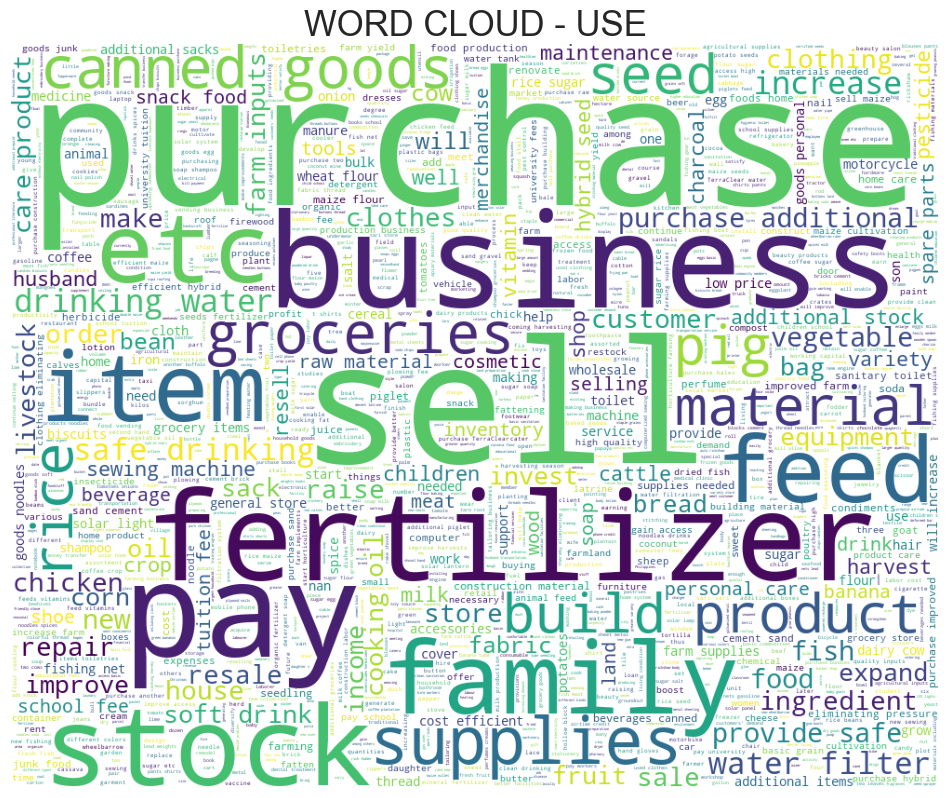

In [236]:
# Creating a set of stopwords using NLTK's built-in STOPWORDS
stopwords_set = set(STOPWORDS)

# Adding custom stopwords to the set
new_stopwords = ['buy']
stopwords_set.update(new_stopwords)

# Generating a WordCloud object with specified parameters
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords_set,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_kiva['use'].astype(str)))

# Creating a figure for the WordCloud visualization
fig = plt.figure(figsize=(12,12))

# Displaying the WordCloud
plt.imshow(wordcloud)

# Adding a title to the WordCloud
plt.title("WORD CLOUD - USE", fontsize=25)

# Removing axis from the plot
plt.axis('off')

# Showing the WordCloud plot
plt.show()



# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Word Cloud Generation for 'Activity'

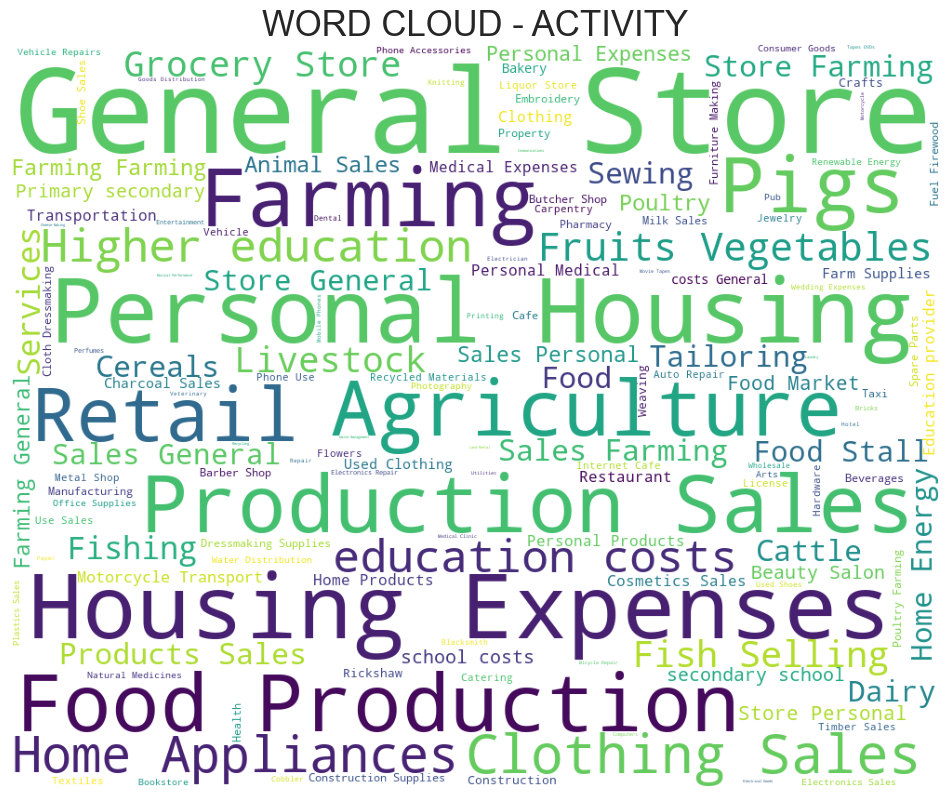

In [237]:
# Setting up Stopwords and Generating Word Cloud for Activity

# Importing necessary libraries and modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Setting up stopwords using NLTK's built-in STOPWORDS
stopwords = set(STOPWORDS)

# Generating WordCloud object with specified parameters
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=600,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_kiva['activity'].astype(str)))

# Displaying the WordCloud object
print(wordcloud)

# Creating a figure for the WordCloud visualization
fig = plt.figure(figsize=(12,14))

# Displaying the WordCloud
plt.imshow(wordcloud)

# Adding a title to the WordCloud
plt.title("WORD CLOUD - ACTIVITY", fontsize=25)

# Removing axis from the plot
plt.axis('off')

# Showing the WordCloud plot
plt.show()


# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Conclusion

## This project explores ExtenKiva's loan dataset, providing insights into microfinance and its transformative potential. Key aspects include data cleaning, descriptive statistical analysis, and exploratory data analysis. The project dives into borrower demographics, loan attributes, temporal dynamics, and impact assessment while employing data visualization techniques. Clear findings and recommendations are synthesized from the analysis, offering valuable information for stakeholders and reflecting the broader implications of microfinance initiatives.

# <p style="background-color:gold; font-family:calibri; color:black; font-size:200%; text-align:center; border-radius:15px 50px;"> "Data science: Where every number tells a story, and every analysis paves the way for new discoveries."